 # <center> EDA: The true cost of Fast Fashion

# Introduction

Introduction
In this analysis we explore the social and environmental impacts of fast fashion.
Some of the topics we will be exploring:

- Environmental impact of different brands
- Working conditions in the industry
- Trends in consumer behavior

Data set obtained from Kaggle:
[The True Cost of Fast Fashion Impact] (https://www.kaggle.com/datasets/khushikyad001/the-true-cost-of-fast-fashion-impact?select=true_cost_fast_fashion.csv)

Author: Khushi Yadav

# Loading dependencies

In [1]:
import pandas as pd # For working with data manipulation and analysis
import numpy as np # For numerical operations and mathematical functions
import matplotlib.pyplot as plt # For creating visualizations and plots
import seaborn as sns # For advanced visualizations

import warnings # To control and suppress warning messages
warnings.filterwarnings("ignore") # Hides non-critical warnings for a cleaner output

# Loading the dataset

In [2]:
import os

# Defining dataset names
dataset_name = "the-true-cost-of-fast-fashion-impact"
file_name = "true_cost_fast_fashion.csv"

# Checking environment
if os.path.exists("/kaggle/input"):
    # File is on Kaggle
    file_path = '/kaggle/input/the-true-cost-of-fast-fashion-impact/true_cost_fast_fashion.csv'

else:
    # My local copy
    file_path = ("./true_cost_fast_fashion.csv") 
    
# Running it in this way enables one to seamlessly work on both Kaggle and in offline Jupyter notebook
    
# Loading the dataset
data = pd.read_csv(file_path)

# Viewing the dataset

In [3]:
data.head() # Views the first 5 rows of the dataset

,Brand,Country,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,...,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,Social_Sentiment_Label,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
0,Shein,Indonesia,2017,574.51,19.31,16,11421.58,282.11,616.63,143.79,...,4655,3435,0.05,Neutral,608.51,0.49,29.12,61.19,13.95,1.46
1,Forever 21,Vietnam,2024,394.50,9.30,20,5571.01,289.22,795.11,167.78,...,9655,6285,-0.12,Positive,689.49,0.21,49.52,3.44,90.93,1.29
2,Uniqlo,India,2024,310.23,25.46,11,10969.00,116.39,364.33,97.81,...,8016,387,0.08,Neutral,439.78,0.63,96.53,60.70,27.60,1.48
3,Forever 21,USA,2017,218.65,13.17,13,13093.00,255.88,632.16,134.54,...,8254,1620,-0.06,Neutral,746.70,0.21,71.32,76.08,56.13,3.85
4,Zara,Indonesia,2016,1005.84,15.40,20,9548.40,142.07,830.10,144.33,...,1778,3292,-0.59,Neutral,571.42,0.95,59.89,69.48,88.05,3.12


In [4]:
data.tail() # Views the last 5 rows of the dataset

,Brand,Country,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,...,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,Social_Sentiment_Label,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
2995,Zara,India,2020,549.36,17.77,21,11214.01,87.08,768.13,165.22,...,3079,3053,0.06,Negative,582.87,0.99,26.52,21.80,33.48,2.63
2996,Shein,USA,2021,670.54,18.05,24,10548.69,275.01,950.90,143.33,...,5297,2617,0.40,Positive,274.78,0.25,89.54,24.81,94.90,0.08
2997,Zara,China,2023,370.31,22.25,22,3385.09,211.81,906.82,104.30,...,6427,4743,-0.71,Negative,607.47,0.75,42.57,75.29,55.28,0.20
2998,Shein,Brazil,2015,649.20,23.00,14,10822.80,232.33,818.08,140.45,...,4487,5178,-0.34,Negative,509.98,0.32,5.59,16.66,20.73,2.89
2999,Zara,India,2018,602.77,13.95,28,8013.18,288.37,360.61,121.67,...,2927,7713,-0.53,Neutral,263.38,0.67,72.84,94.53,40.91,3.53


In [5]:
data.info() # Displays a summary of the dataset,mainly column_names, data_types, and non-null_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         3000 non-null   object 
 1   Country                       3000 non-null   object 
 2   Year                          3000 non-null   int64  
 3   Monthly_Production_Tonnes     3000 non-null   float64
 4   Avg_Item_Price_USD            3000 non-null   float64
 5   Release_Cycles_Per_Year       3000 non-null   int64  
 6   Carbon_Emissions_tCO2e        3000 non-null   float64
 7   Water_Usage_Million_Litres    3000 non-null   float64
 8   Landfill_Waste_Tonnes         3000 non-null   float64
 9   Avg_Worker_Wage_USD           3000 non-null   float64
 10  Working_Hours_Per_Week        3000 non-null   int64  
 11  Child_Labor_Incidents         3000 non-null   int64  
 12  Return_Rate_Percent           3000 non-null   float64
 13  Avg

- We have around 3000 rows and 25 columns

# Checking for Null values and Duplicates

In [6]:
data.isnull().sum() # Checking the null count of this dataset

Brand                           0
Country                         0
Year                            0
Monthly_Production_Tonnes       0
Avg_Item_Price_USD              0
Release_Cycles_Per_Year         0
Carbon_Emissions_tCO2e          0
Water_Usage_Million_Litres      0
Landfill_Waste_Tonnes           0
Avg_Worker_Wage_USD             0
Working_Hours_Per_Week          0
Child_Labor_Incidents           0
Return_Rate_Percent             0
Avg_Spend_Per_Customer_USD      0
Shopping_Frequency_Per_Year     0
Instagram_Mentions_Thousands    0
TikTok_Mentions_Thousands       0
Sentiment_Score                 0
Social_Sentiment_Label          0
GDP_Contribution_Million_USD    0
Env_Cost_Index                  0
Sustainability_Score            0
Transparency_Index              0
Compliance_Score                0
Ethical_Rating                  0
dtype: int64

- The null count in this dataset is zero

In [7]:
data.isnull().mean()*100 # Calculates the percentage of missing values in each column

Brand                           0.0
Country                         0.0
Year                            0.0
Monthly_Production_Tonnes       0.0
Avg_Item_Price_USD              0.0
Release_Cycles_Per_Year         0.0
Carbon_Emissions_tCO2e          0.0
Water_Usage_Million_Litres      0.0
Landfill_Waste_Tonnes           0.0
Avg_Worker_Wage_USD             0.0
Working_Hours_Per_Week          0.0
Child_Labor_Incidents           0.0
Return_Rate_Percent             0.0
Avg_Spend_Per_Customer_USD      0.0
Shopping_Frequency_Per_Year     0.0
Instagram_Mentions_Thousands    0.0
TikTok_Mentions_Thousands       0.0
Sentiment_Score                 0.0
Social_Sentiment_Label          0.0
GDP_Contribution_Million_USD    0.0
Env_Cost_Index                  0.0
Sustainability_Score            0.0
Transparency_Index              0.0
Compliance_Score                0.0
Ethical_Rating                  0.0
dtype: float64

- There are no null values in this dataset

In [8]:
data.duplicated().sum() # Checking for duplicate entries in the dataset

np.int64(0)

There are no duplicates in this dataset

# Visualizations

### KDE Plots

- KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.
- The KDE plot visually represents the distribution of data, providing insights into its shape, central tendency, and spread. It is particularly useful when dealing with continuous data or when you want to explore the distribution without making assumptions about a specific parametric form (e.g., assuming the data follows a normal distribution).

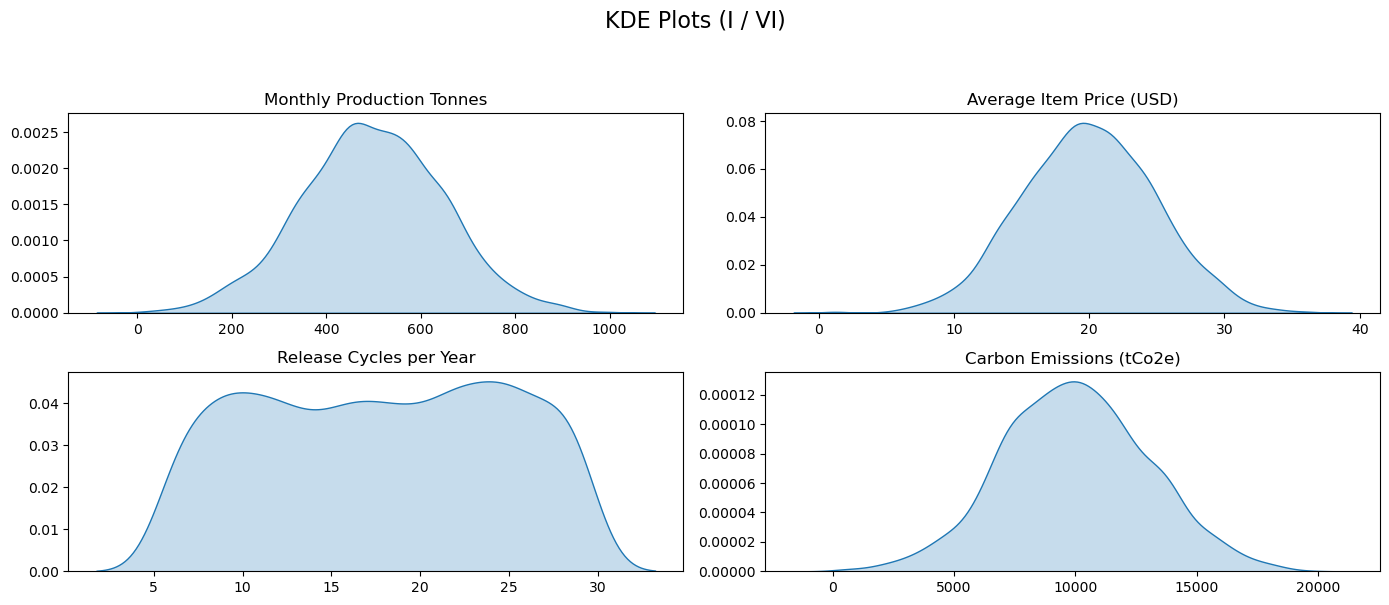

In [9]:
plt.figure(figsize=(14,6)) # Sets the overall figure size (width = 14, height = 6)

# -- First subplot
plt.subplot(2,2,1) # Create subplot layout: 2 rows, 2 columns, current plot = 1st position
sns.kdeplot(data, x = "Monthly_Production_Tonnes", fill = "True") # KDE plot showing distribution of monthly production volumes
plt.title("Monthly Production Tonnes") # Title for subplot
plt.ylabel("") # Removes y-axis label for cleaner look
plt.xlabel("") # Removes x-axis label for cleaner look

# -- Second subplot
plt.subplot(2,2,2) # 2nd position subplot
sns.kdeplot(data, x = "Avg_Item_Price_USD", fill = "True") # KDE for Average item price
plt.title("Average Item Price (USD)")
plt.ylabel("")
plt.xlabel("")

# -- Third subplot
plt.subplot(2,2,3) # 3rd position subplot
sns.kdeplot(data, x = "Release_Cycles_Per_Year", fill = "True") # KDE for number of release cycles
plt.title("Release Cycles per Year")
plt.ylabel("")
plt.xlabel("")

# -- Fourth subplot
plt.subplot(2,2,4) # 4th position subplot
sns.kdeplot(data, x = "Carbon_Emissions_tCO2e", fill = "True") # KDE for Carbon emissions
plt.title("Carbon Emissions (tCo2e)")
plt.ylabel("")
plt.xlabel("")


plt.suptitle("KDE Plots (I / VI)", fontsize = 16, y = 1.0) # Title for all four plots
plt.tight_layout(rect=[0,0,1,0.95]) # Adjust spacing
plt.show() # Display plots

- Monthly Production Tonnes : Production is typically stable around 400-600 tonnes but some months have unusually high output.
- Average Item Price : Most items are priced around $20 or less, with only a few premium-priced outliers.
- Release Cycles per Year : The chart has has multiple small peaks, suggesting variation among product types or strategies.
- Carbon Emissions (tCO2e)  : A majority of production activities emit under 10,000 tCO2e, but a few generate very high emissions.

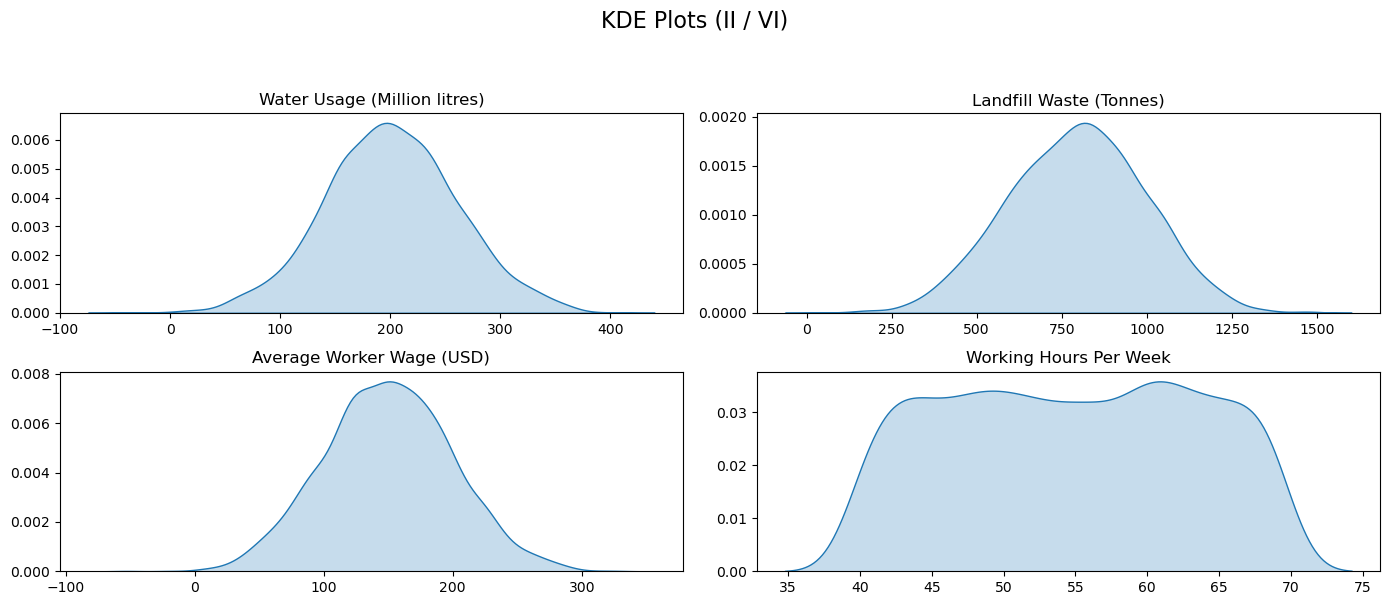

In [10]:
plt.figure(figsize=(14,6)) # Sets the overall figure size (width = 14, height = 6)

# -- First subplot
plt.subplot(2,2,1) # Create subplot layout: 2 rows, 2 columns, current plot = 1st position
sns.kdeplot(data, x = "Water_Usage_Million_Litres", fill = "True") # KDE plot showing distribution of Water Usage
plt.title("Water Usage (Million litres)") # Title for subplot
plt.ylabel("") # Removes y-axis label for cleaner look
plt.xlabel("") # Removes x-axis label for cleaner look

# -- Second subplot
plt.subplot(2,2,2)
sns.kdeplot(data, x = "Landfill_Waste_Tonnes", fill = "True") # KDE plot showing distribution of Landfill Waste
plt.title("Landfill Waste (Tonnes)")
plt.ylabel("")
plt.xlabel("")

# -- Third subplot
plt.subplot(2,2,3)
sns.kdeplot(data, x = "Avg_Worker_Wage_USD", fill = "True") # KDE plot showing distribution of Average Worker Wage
plt.title("Average Worker Wage (USD)")
plt.ylabel("")
plt.xlabel("")

# -- Fourth subplot
plt.subplot(2,2,4)
sns.kdeplot(data, x = "Working_Hours_Per_Week", fill = "True")  # KDE plot showing distribution of Working Hours per Week
plt.title("Working Hours Per Week")
plt.ylabel("")
plt.xlabel("")

plt.suptitle("KDE Plots (II / VI)", fontsize = 16, y = 1.0) # Title
plt.tight_layout(rect=[0,0,1,0.95]) # Adjust spacing

plt.show() # Display

- Water Usage (Million litres) : Most production uses around 200 litres but some take double that.
- Landfill Waste (Tonnes) : Most production generates around 750 tonnes but some brands generate waste that is twice that.
- Average Worker Wage : Most workers are paid between 100 to 200 USD and very few are paid above 250 USD.
- Working Hours per Week : Large spread with multiple peaks; the norm appears to be most people are working 45-65 hours per week. However, some people are working more than 70 hours a week.

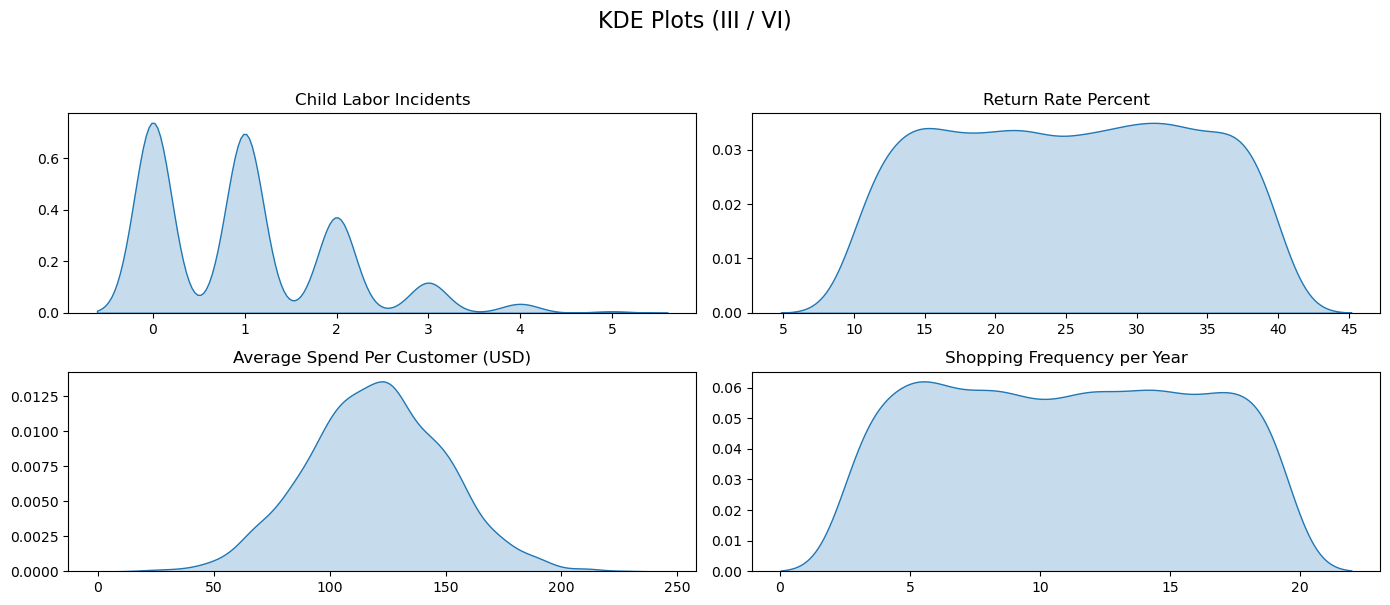

In [11]:
plt.figure(figsize=(14,6)) # Sets the overall figure size (width = 14, height = 6)

# -- First subplot
plt.subplot(2,2,1) # Create subplot layout: 2 rows, 2 columns, current plot = 1st position
sns.kdeplot(data, x = "Child_Labor_Incidents", fill = "True") # KDE plot showing distribution of Child Labour Incidents
plt.title("Child Labor Incidents") # Title for subplot
plt.ylabel("") # Removes y-axis label for cleaner look
plt.xlabel("") # Removes x-axis label for cleaner look

# -- Second subplot
plt.subplot(2,2,2)
sns.kdeplot(data, x = "Return_Rate_Percent", fill = "True") # KDE plot showing distribution of Return Rate %
plt.title("Return Rate Percent")
plt.ylabel("")
plt.xlabel("")

# -- Third subplot
plt.subplot(2,2,3)
sns.kdeplot(data, x = "Avg_Spend_Per_Customer_USD", fill = "True") # KDE plot showing distribution of Average Spend per Customer
plt.title("Average Spend Per Customer (USD)")
plt.ylabel("")
plt.xlabel("")

# -- Fourth subplot
plt.subplot(2,2,4)
sns.kdeplot(data, x = "Shopping_Frequency_Per_Year", fill = "True") # KDE plot showing distribution of Shopping Frequency per Year
plt.title("Shopping Frequency per Year")
plt.ylabel("")
plt.xlabel("")

plt.suptitle("KDE Plots (III / VI)", fontsize = 16, y = 1.0) # Title
plt.tight_layout(rect=[0,0,1,0.95]) # Adjust spacing

plt.show()

- Child Labor Incidents : Most brands report zero or isolated child labor incidents, but a few show recurring issues, indicating uneven enforcement of labor standards.
- Return Rate Percent : Return rates are fairly consistent across brands, typically between 15–35%, hinting that return policies and customer satisfaction are relatively stable.
- Average Spend per Customer : Most customers spend under 100 or 150 USD with select few items spending above 150 USD.
- Shopping Frequency per Year : The distribution is fairly uniform from 5–15 purchases per year, tapering off afterward. Customers tend to shop multiple times a year, reinforcing the idea that fast fashion encourages repeated, frequent buying behavior.

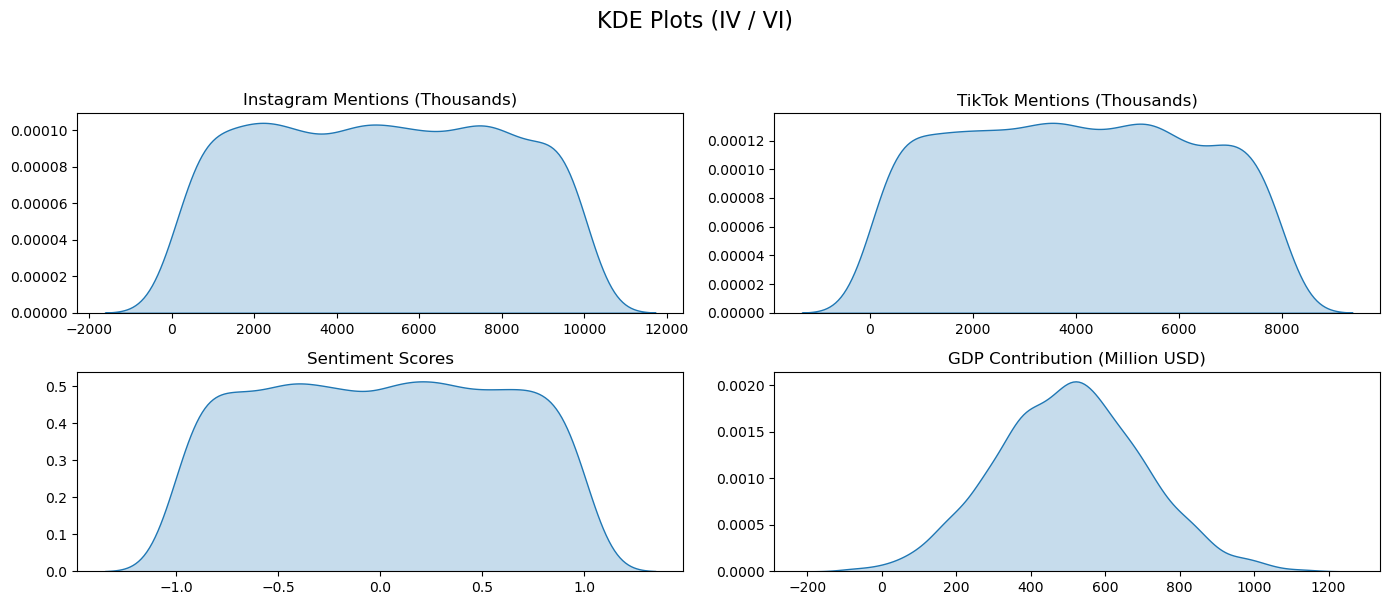

In [12]:
plt.figure(figsize=(14,6)) # Sets the overall figure size (width = 14, height = 6)

# -- First subplot
plt.subplot(2,2,1) # Create subplot layout: 2 rows, 2 columns, current plot = 1st position
sns.kdeplot(data, x = "Instagram_Mentions_Thousands", fill = "True")
plt.title("Instagram Mentions (Thousands)") # Title for subplot
plt.ylabel("") # Removes y-axis label for cleaner look
plt.xlabel("") # Removes x-axis label for cleaner look

# -- Second subplot
plt.subplot(2,2,2)
sns.kdeplot(data, x = "TikTok_Mentions_Thousands", fill = "True") # KDE plot showing distribution of TikTok Mentions
plt.title("TikTok Mentions (Thousands)")
plt.ylabel("")
plt.xlabel("")

# -- Third subplot
plt.subplot(2,2,3)
sns.kdeplot(data, x = "Sentiment_Score", fill = "True") # KDE plot showing distribution of Sentiment Score
plt.title("Sentiment Scores")
plt.ylabel("")
plt.xlabel("")

# -- Fourth subplot
plt.subplot(2,2,4)
sns.kdeplot(data, x = "GDP_Contribution_Million_USD", fill = "True") # KDE plot showing distribution of GDP Contribution
plt.title("GDP Contribution (Million USD)")
plt.ylabel("")
plt.xlabel("")

plt.suptitle("KDE Plots (IV / VI)", fontsize = 16, y = 1.0) # Title
plt.tight_layout(rect=[0,0,1,0.95]) # Adjust spacing

plt.show()

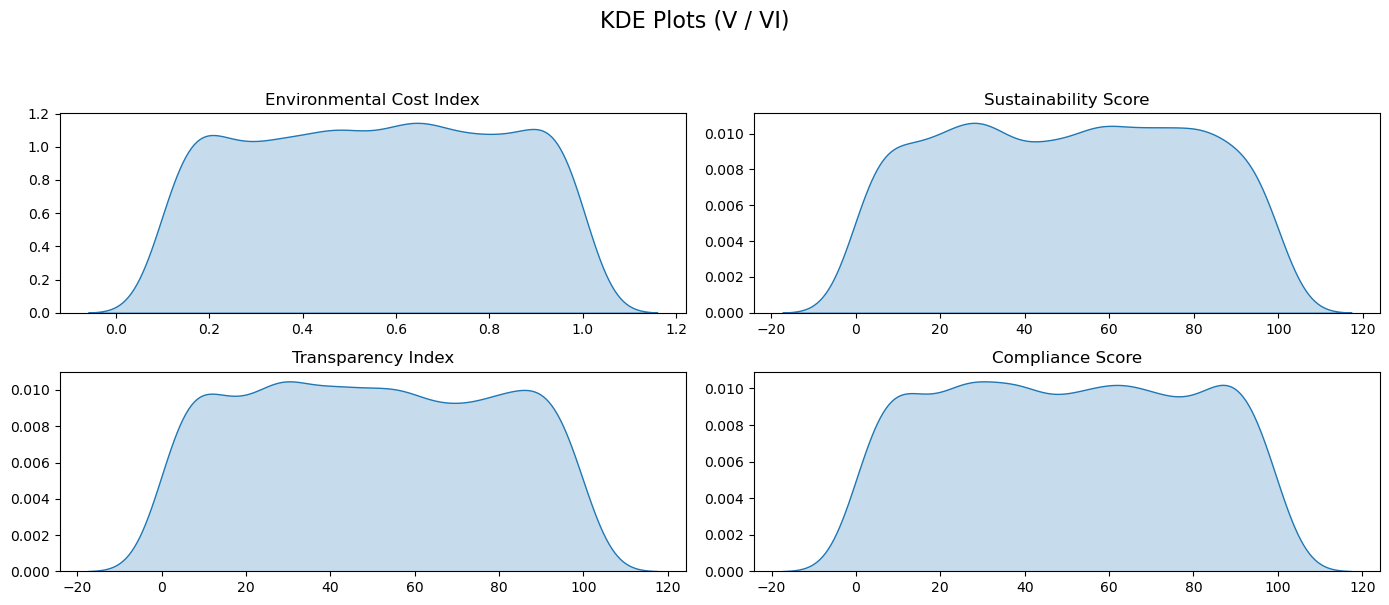

In [13]:
plt.figure(figsize=(14,6)) # Sets the overall figure size (width = 14, height = 6)

# -- First subplot
plt.subplot(2,2,1) # Create subplot layout: 2 rows, 2 columns, current plot = 1st position
sns.kdeplot(data, x = "Env_Cost_Index", fill = "True")
plt.title("Environmental Cost Index") # Title for subplot
plt.ylabel("") # Removes y-axis label for cleaner look
plt.xlabel("") # Removes x-axis label for cleaner look

# -- Second subplot
plt.subplot(2,2,2)
sns.kdeplot(data, x = "Sustainability_Score", fill = "True")  # KDE plot showing distribution of Sustainability Score
plt.title("Sustainability Score")
plt.ylabel("")
plt.xlabel("")

# -- Third subplot
plt.subplot(2,2,3)
sns.kdeplot(data, x = "Transparency_Index", fill = "True") # KDE plot showing distribution of Transparency Index
plt.title("Transparency Index")
plt.ylabel("")
plt.xlabel("")

# -- Fourth subplot
plt.subplot(2,2,4)
sns.kdeplot(data, x = "Compliance_Score", fill = "True") # KDE plot showing distribution of Compliance scores
plt.title("Compliance Score")
plt.ylabel("")
plt.xlabel("")

plt.suptitle("KDE Plots (V / VI)", fontsize = 16, y = 1.0) # Title
plt.tight_layout(rect=[0,0,1,0.95]) # Adjust spacing

plt.show()

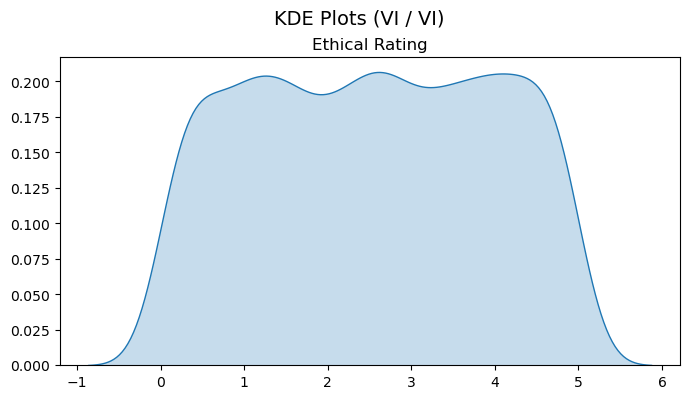

In [14]:
plt.figure(figsize=(8,4))

sns.kdeplot(data, x = "Ethical_Rating", fill = "True")  # KDE plot showing distribution of Ethical Ratings
plt.title("Ethical Rating") # Title for plot
plt.ylabel("") # Removes y-axis label for cleaner look
plt.xlabel("") # Removes x-axis label for cleaner look

plt.suptitle("KDE Plots (VI / VI)", fontsize = 14, y = 1.0) # Title
plt.show()

## Boxplots - How do the brands stack up against eachother?

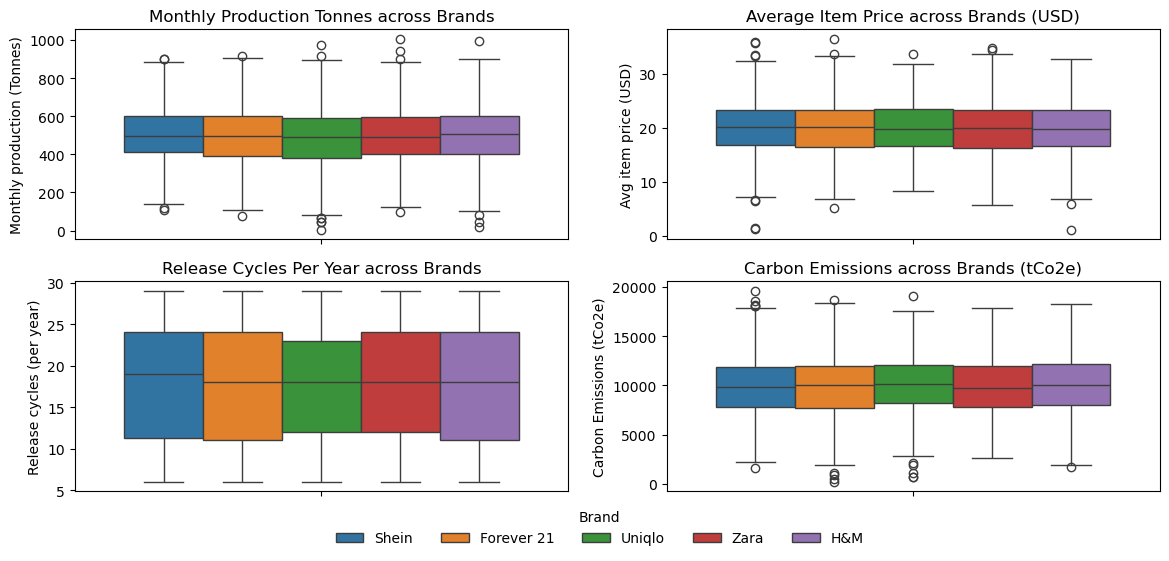

In [15]:
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
box1 = sns.boxplot(data, y="Monthly_Production_Tonnes",hue="Brand")
plt.title("Monthly Production Tonnes across Brands")
plt.ylabel("Monthly production (Tonnes)")
plt.legend().remove()

plt.subplot(2,2,2)
sns.boxplot(data, y="Avg_Item_Price_USD", hue="Brand")
plt.title("Average Item Price across Brands (USD)")
plt.ylabel("Avg item price (USD)")
plt.legend().remove()

plt.subplot(2,2,3)
sns.boxplot(data, y="Release_Cycles_Per_Year", hue="Brand")
plt.title("Release Cycles Per Year across Brands")
plt.ylabel("Release cycles (per year)")
plt.legend().remove()

plt.subplot(2,2,4)
sns.boxplot(data, y="Carbon_Emissions_tCO2e", hue="Brand")
plt.title("Carbon Emissions across Brands (tCo2e)")
plt.ylabel("Carbon Emissions (tCo2e)")
plt.legend().remove()

handles, labels = box1.get_legend_handles_labels()
if handles and labels:
    plt.figlegend(
    handles, labels, title="Brand",
    loc = 'lower center',
    bbox_to_anchor=(0.5, -0.001),
    ncol = len(labels),
    frameon = False
)

plt.show()

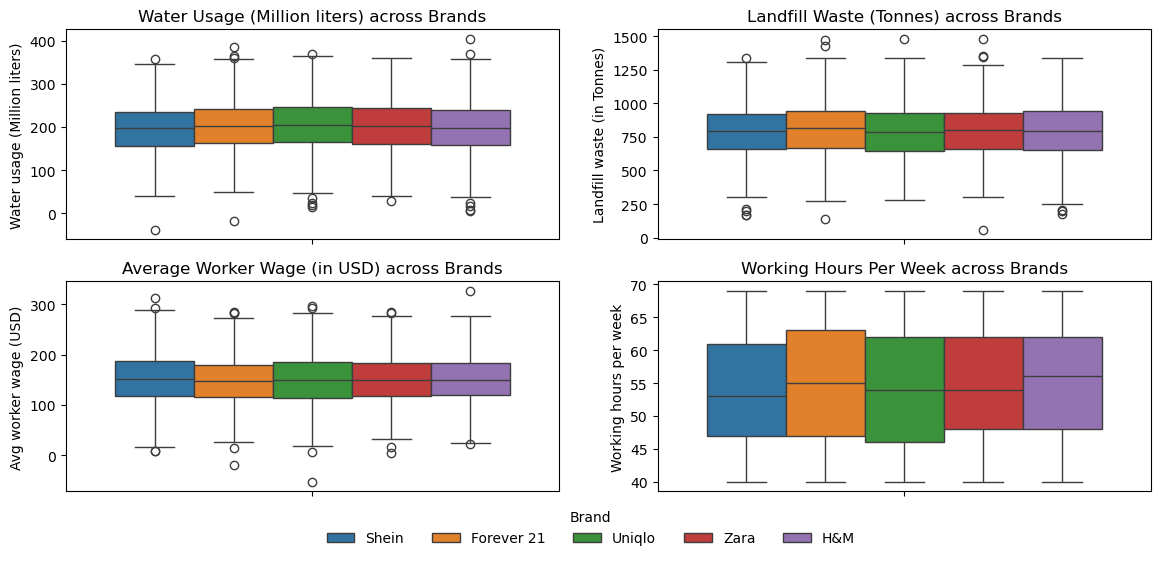

In [16]:
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
box2 = sns.boxplot(data, y = "Water_Usage_Million_Litres", hue = "Brand")
plt.title("Water Usage (Million liters) across Brands")
plt.ylabel("Water usage (Million liters)")
plt.legend().remove()

plt.subplot(2,2,2)
sns.boxplot(data, y = "Landfill_Waste_Tonnes", hue = "Brand")
plt.title("Landfill Waste (Tonnes) across Brands")
plt.ylabel("Landfill waste (in Tonnes)")
plt.legend().remove()

plt.subplot(2,2,3)
sns.boxplot(data, y = "Avg_Worker_Wage_USD", hue = "Brand")
plt.title("Average Worker Wage (in USD) across Brands")
plt.ylabel("Avg worker wage (USD)")
plt.legend().remove()

plt.subplot(2,2,4)
sns.boxplot(data, y = "Working_Hours_Per_Week", hue = "Brand")
plt.title("Working Hours Per Week across Brands")
plt.ylabel("Working hours per week")
plt.legend().remove()

handles,labels = box2.get_legend_handles_labels()
if handles and labels:
    plt.figlegend(
    handles, labels, title = "Brand",
    loc = "lower center",
    bbox_to_anchor = (0.5, -0.001),
    ncol = len(labels),
    frameon = False    
)

plt.show()

#### Here, notice how two charts "Water Usage (Million liters) Across Brands" and "Average Worker Wage (in USD) Across Brands" have outliers that fall below zero; as these rows do not make logical sense they will be dropped.

In [17]:
data = data[data.Water_Usage_Million_Litres > 0]

In [18]:
data = data[data.Avg_Worker_Wage_USD > 0].reset_index(drop = True)

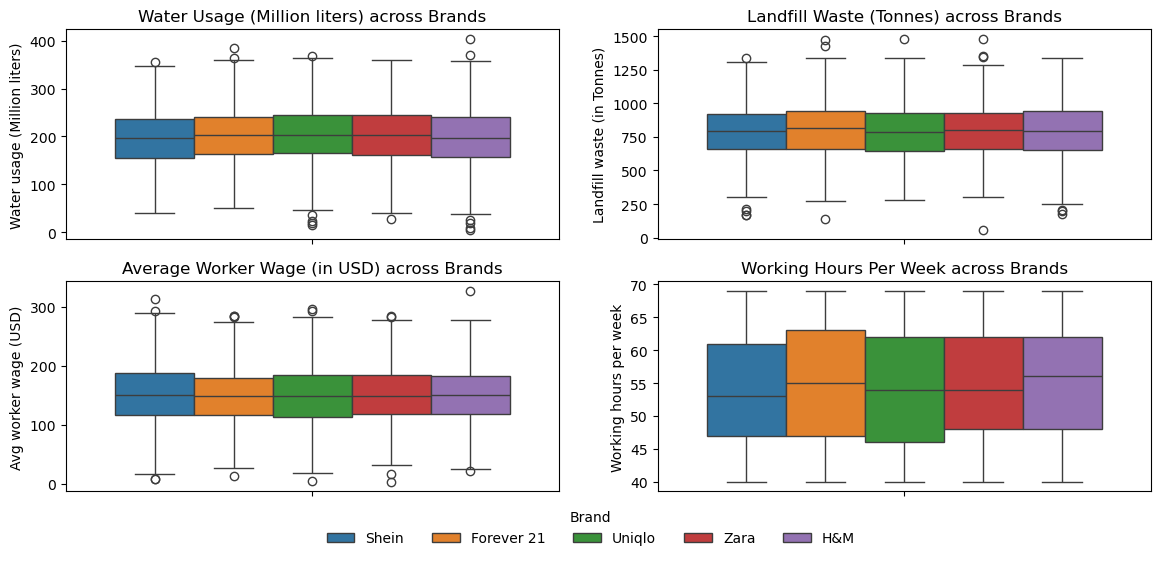

In [19]:
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
box2 = sns.boxplot(data, y = "Water_Usage_Million_Litres", hue = "Brand")
plt.title("Water Usage (Million liters) across Brands")
plt.ylabel("Water usage (Million liters)")
plt.legend().remove()

plt.subplot(2,2,2)
sns.boxplot(data, y = "Landfill_Waste_Tonnes", hue = "Brand")
plt.title("Landfill Waste (Tonnes) across Brands")
plt.ylabel("Landfill waste (in Tonnes)")
plt.legend().remove()

plt.subplot(2,2,3)
sns.boxplot(data, y = "Avg_Worker_Wage_USD", hue = "Brand")
plt.title("Average Worker Wage (in USD) across Brands")
plt.ylabel("Avg worker wage (USD)")
plt.legend().remove()

plt.subplot(2,2,4)
sns.boxplot(data, y = "Working_Hours_Per_Week", hue = "Brand")
plt.title("Working Hours Per Week across Brands")
plt.ylabel("Working hours per week")
plt.legend().remove()

handles,labels = box2.get_legend_handles_labels()
if handles and labels:
    plt.figlegend(
    handles, labels, title = "Brand",
    loc = "lower center",
    bbox_to_anchor = (0.5, -0.001),
    ncol = len(labels),
    frameon = False    
)

plt.show()

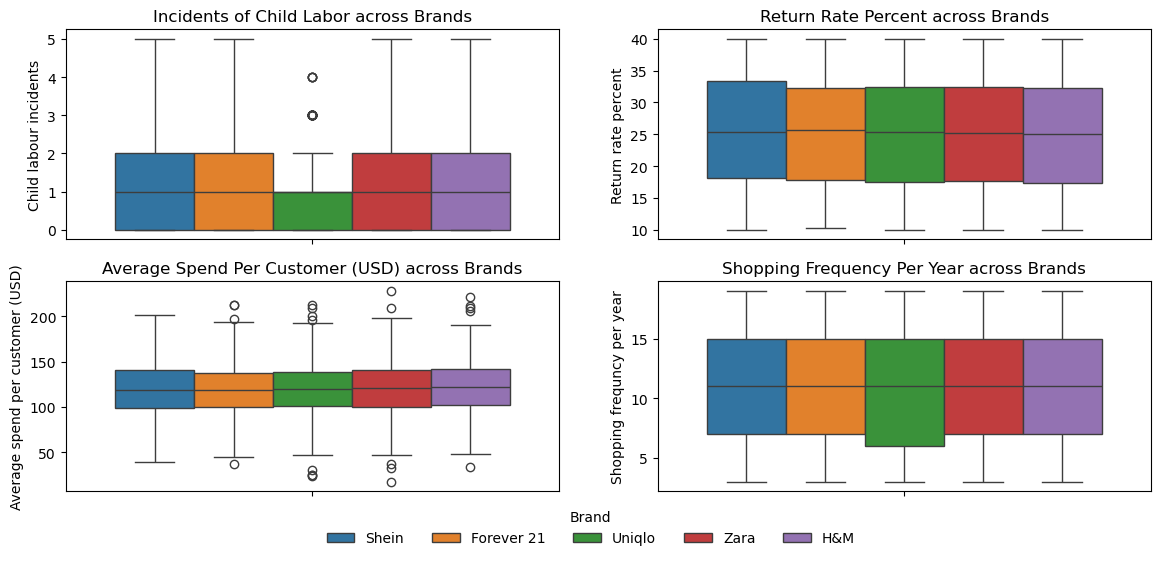

In [20]:
plt.figure(figsize = (14,6))

plt.subplot(2,2,1)
box3 = sns.boxplot(data, y = "Child_Labor_Incidents", hue = "Brand")
plt.title("Incidents of Child Labor across Brands")
plt.ylabel("Child labour incidents")
plt.legend().remove()

plt.subplot(2,2,2)
sns.boxplot(data, y = "Return_Rate_Percent", hue = "Brand")
plt.title("Return Rate Percent across Brands")
plt.ylabel("Return rate percent")
plt.legend().remove()

plt.subplot(2,2,3)
sns.boxplot(data, y = "Avg_Spend_Per_Customer_USD", hue = "Brand")
plt.title("Average Spend Per Customer (USD) across Brands")
plt.ylabel("Average spend per customer (USD)")
plt.legend().remove()

plt.subplot(2,2,4)
sns.boxplot(data, y = "Shopping_Frequency_Per_Year", hue = "Brand")
plt.title("Shopping Frequency Per Year across Brands")
plt.ylabel("Shopping frequncy per year")
plt.legend().remove()

handles, labels = box3.get_legend_handles_labels()
if handles and labels:
    plt.figlegend(
    handles, labels, title = "Brand",
    loc = "lower center",
    bbox_to_anchor = (0.5, -0.001),
    ncol = len(labels),
    frameon = False
)

plt.show()

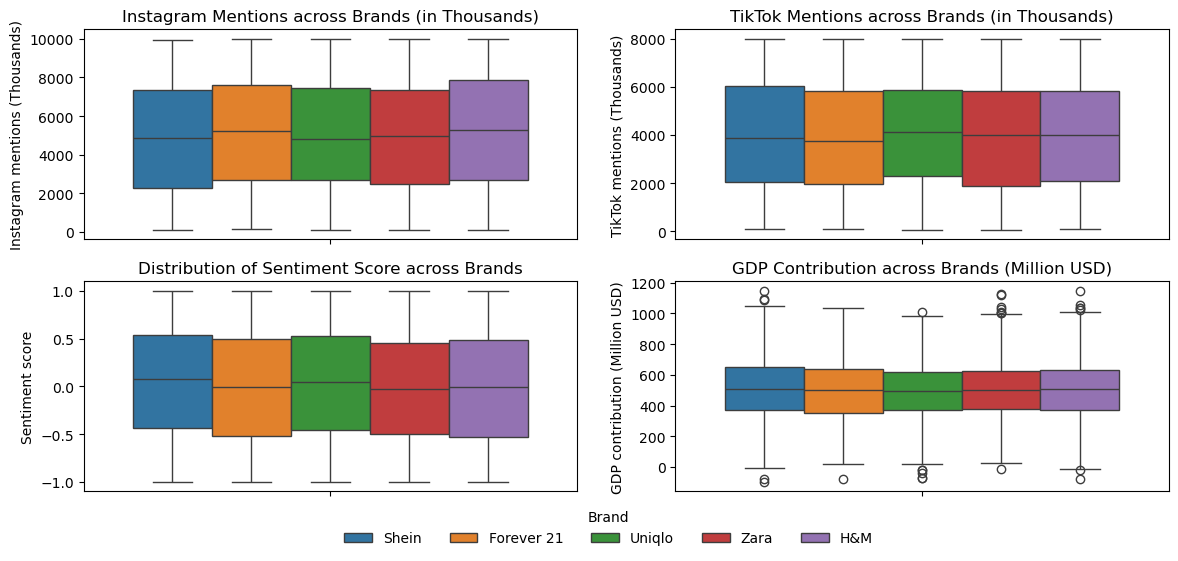

In [21]:
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
box4 = sns.boxplot(data, y = "Instagram_Mentions_Thousands", hue = "Brand")
plt.title("Instagram Mentions across Brands (in Thousands)")
plt.ylabel("Instagram mentions (Thousands)")
plt.legend().remove()

plt.subplot(2,2,2)
sns.boxplot(data, y = "TikTok_Mentions_Thousands", hue = "Brand")
plt.title("TikTok Mentions across Brands (in Thousands)")
plt.ylabel("TikTok mentions (Thousands)")
plt.legend().remove()

plt.subplot(2,2,3)
sns.boxplot(data, y = "Sentiment_Score", hue = "Brand")
plt.title("Distribution of Sentiment Score across Brands")
plt.ylabel("Sentiment score")
plt.legend().remove()

plt.subplot(2,2,4)
sns.boxplot(data, y = "GDP_Contribution_Million_USD", hue = "Brand")
plt.title("GDP Contribution across Brands (Million USD)")
plt.ylabel("GDP contribution (Million USD)")
plt.legend().remove()

handles, labels = box1.get_legend_handles_labels()
if handles and labels:
    plt.figlegend(
    handles,labels,title = "Brand",
    loc = "lower center",
    bbox_to_anchor = (0.5, -0.001),
    ncol = len(labels),
    frameon = False
)

plt.show()

#### We need to drop the negative values from "GDP_Contribution_Million_USD" variable

In [22]:
data = data[data["GDP_Contribution_Million_USD"] > 0]

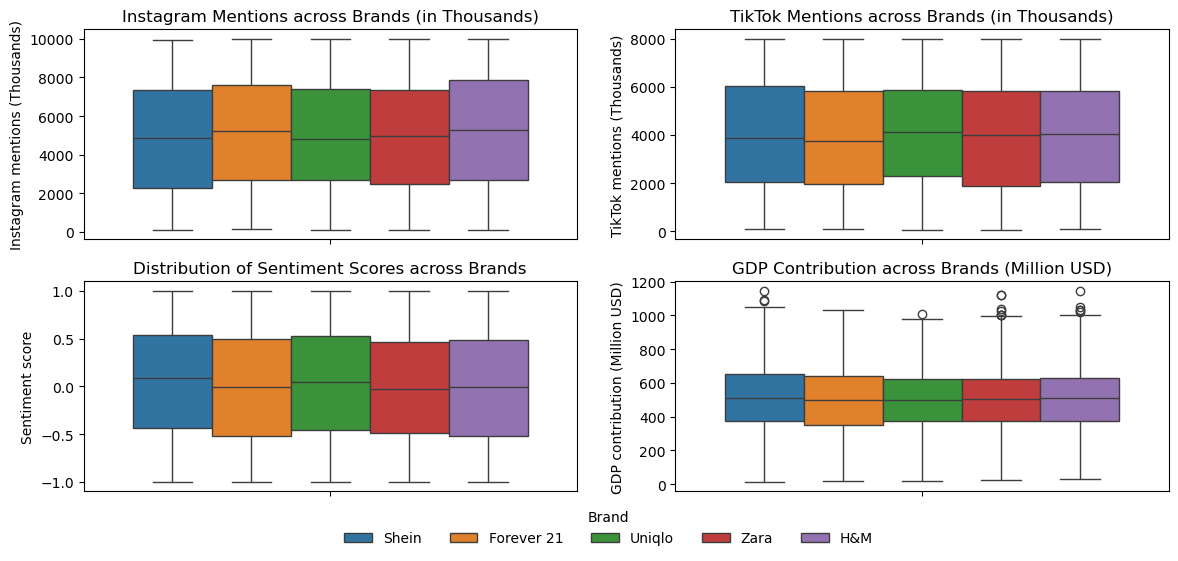

In [23]:
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
box4 = sns.boxplot(data, y = "Instagram_Mentions_Thousands", hue = "Brand")
plt.title("Instagram Mentions across Brands (in Thousands)")
plt.ylabel("Instagram mentions (Thousands)")
plt.legend().remove()

plt.subplot(2,2,2)
sns.boxplot(data, y = "TikTok_Mentions_Thousands", hue = "Brand")
plt.title("TikTok Mentions across Brands (in Thousands)")
plt.ylabel("TikTok mentions (Thousands)")
plt.legend().remove()

plt.subplot(2,2,3)
sns.boxplot(data, y = "Sentiment_Score", hue = "Brand")
plt.title("Distribution of Sentiment Scores across Brands")
plt.ylabel("Sentiment score")
plt.legend().remove()

plt.subplot(2,2,4)
sns.boxplot(data, y = "GDP_Contribution_Million_USD", hue = "Brand")
plt.title("GDP Contribution across Brands (Million USD)")
plt.ylabel("GDP contribution (Million USD)")
plt.legend().remove()

handles, labels = box1.get_legend_handles_labels()
if handles and labels:
    plt.figlegend(
    handles,labels,title = "Brand",
    loc = "lower center",
    bbox_to_anchor = (0.5, -0.001),
    ncol = len(labels),
    frameon = False
)

plt.show()

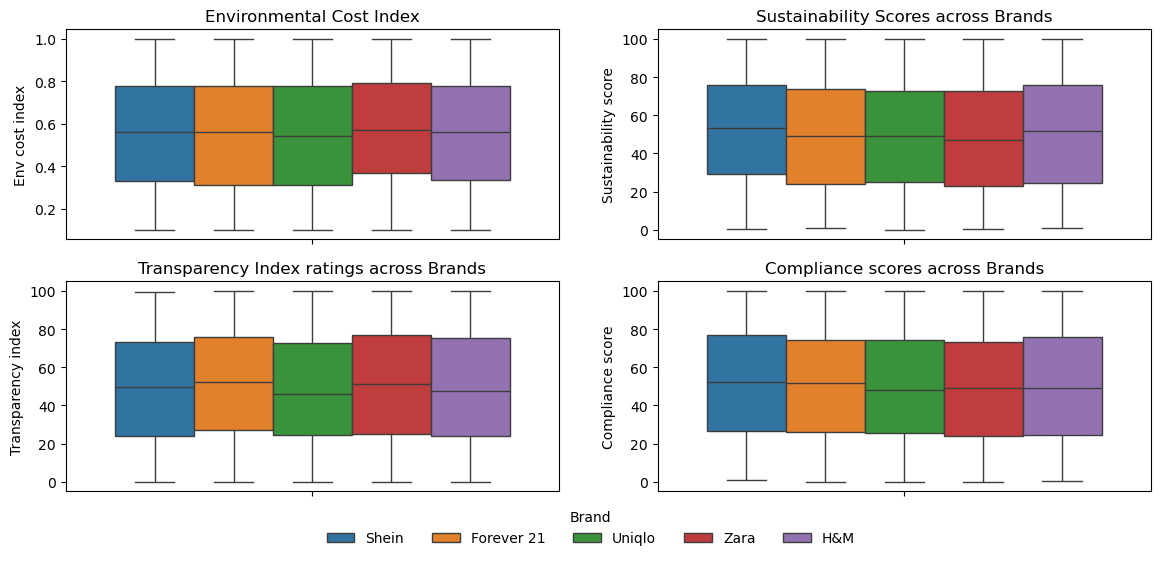

In [24]:
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
box5 = sns.boxplot(data, y = "Env_Cost_Index", hue = "Brand")
plt.title("Environmental Cost Index")
plt.ylabel("Env cost index")
plt.legend().remove()

plt.subplot(2,2,2)
sns.boxplot(data, y = "Sustainability_Score", hue = "Brand")
plt.title("Sustainability Scores across Brands")
plt.ylabel("Sustainability score")
plt.legend().remove()

plt.subplot(2,2,3)
sns.boxplot(data, y = "Transparency_Index", hue = "Brand")
plt.title("Transparency Index ratings across Brands")
plt.ylabel("Transparency index")
plt.legend().remove()

plt.subplot(2,2,4)
sns.boxplot(data, y = "Compliance_Score", hue = "Brand")
plt.title("Compliance scores across Brands")
plt.ylabel("Compliance score")
plt.legend().remove()

handles, legend = box5.get_legend_handles_labels()
if handles and labels:
    plt.figlegend(
    handles, labels, title = "Brand",
    loc = "lower center",
    bbox_to_anchor = (0.5, -0.001),
    ncol = len(labels),
    frameon = False
)

plt.show()

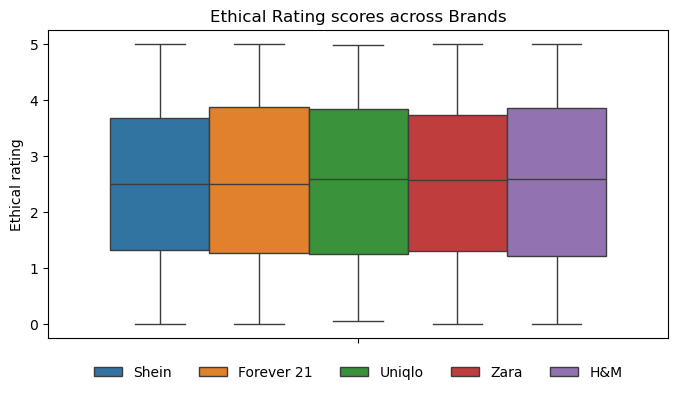

In [25]:
plt.figure(figsize=(8,4))

sns.boxplot(
    data,
    y = "Ethical_Rating",
    hue = "Brand"
)

plt.title("Ethical Rating scores across Brands")
plt.ylabel("Ethical rating")
if handles and labels:
    plt.legend(
    loc = "upper center",
    bbox_to_anchor = (0.5,-0.05),
    ncol = len(labels),
    frameon = False
)

plt.show()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2983 entries, 0 to 2995
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         2983 non-null   object 
 1   Country                       2983 non-null   object 
 2   Year                          2983 non-null   int64  
 3   Monthly_Production_Tonnes     2983 non-null   float64
 4   Avg_Item_Price_USD            2983 non-null   float64
 5   Release_Cycles_Per_Year       2983 non-null   int64  
 6   Carbon_Emissions_tCO2e        2983 non-null   float64
 7   Water_Usage_Million_Litres    2983 non-null   float64
 8   Landfill_Waste_Tonnes         2983 non-null   float64
 9   Avg_Worker_Wage_USD           2983 non-null   float64
 10  Working_Hours_Per_Week        2983 non-null   int64  
 11  Child_Labor_Incidents         2983 non-null   int64  
 12  Return_Rate_Percent           2983 non-null   float64
 13  Avg_Spen

## Correlation matrix

In [27]:
data_numerical = data.select_dtypes(float)

In [28]:
data_numerical.corr()

,Monthly_Production_Tonnes,Avg_Item_Price_USD,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,Return_Rate_Percent,Avg_Spend_Per_Customer_USD,Sentiment_Score,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
Monthly_Production_Tonnes,1.000000,-0.032274,-0.026083,0.021410,0.001075,0.010728,0.011973,-0.010728,0.010671,0.003177,-0.023475,-0.017811,-0.008366,-0.016847,0.005982
Avg_Item_Price_USD,-0.032274,1.000000,-0.009842,0.034353,-0.015915,-0.012390,-0.044769,-0.004346,-0.014746,-0.007499,-0.015740,-0.014433,-0.040486,0.002278,0.000473
Carbon_Emissions_tCO2e,-0.026083,-0.009842,1.000000,-0.011699,0.019308,0.050382,0.002055,-0.021090,-0.009006,0.011168,-0.018256,0.008451,0.011063,0.030789,0.005914
Water_Usage_Million_Litres,0.021410,0.034353,-0.011699,1.000000,0.011871,-0.006863,-0.029772,-0.001225,0.013986,-0.024775,0.010284,-0.007458,0.004356,-0.004675,0.017460
Landfill_Waste_Tonnes,0.001075,-0.015915,0.019308,0.011871,1.000000,-0.008571,-0.029129,0.020694,0.006675,0.007882,-0.003694,0.003928,0.008316,-0.001334,0.004024
Avg_Worker_Wage_USD,0.010728,-0.012390,0.050382,-0.006863,-0.008571,1.000000,0.016422,0.007405,0.043727,-0.016978,0.024052,-0.002606,0.026066,-0.015818,0.022110
Return_Rate_Percent,0.011973,-0.044769,0.002055,-0.029772,-0.029129,0.016422,1.000000,0.011715,0.004480,0.001902,-0.012896,0.006419,-0.012260,0.016359,-0.010259
Avg_Spend_Per_Customer_USD,-0.010728,-0.004346,-0.021090,-0.001225,0.020694,0.007405,0.011715,1.000000,-0.028744,0.014738,0.005584,-0.010465,0.017717,0.003145,-0.023754
Sentiment_Score,0.010671,-0.014746,-0.009006,0.013986,0.006675,0.043727,0.004480,-0.028744,1.000000,-0.014967,0.006784,-0.004002,0.012310,0.026007,-0.008547
GDP_Contribution_Million_USD,0.003177,-0.007499,0.011168,-0.024775,0.007882,-0.016978,0.001902,0.014738,-0.014967,1.000000,0.032868,0.022535,0.033031,-0.000962,-0.016401


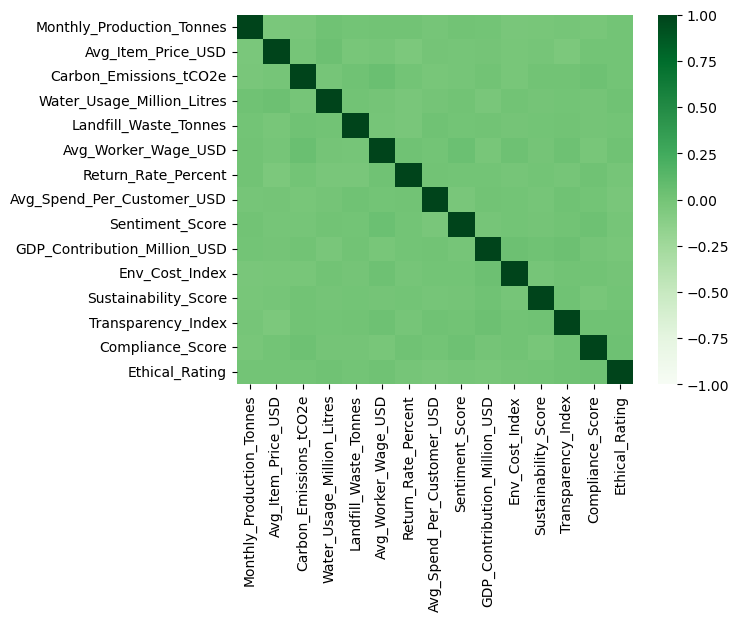

In [29]:
sns.heatmap(data_numerical.corr(), vmin = -1, vmax = 1 , annot = False, cmap = "Greens")
plt.savefig("corrheatmap.png", dpi = 300)

In [30]:
data_numerical.corr()[['Monthly_Production_Tonnes']]

,Monthly_Production_Tonnes
Monthly_Production_Tonnes,1.000000
Avg_Item_Price_USD,-0.032274
Carbon_Emissions_tCO2e,-0.026083
Water_Usage_Million_Litres,0.021410
Landfill_Waste_Tonnes,0.001075
Avg_Worker_Wage_USD,0.010728
Return_Rate_Percent,0.011973
Avg_Spend_Per_Customer_USD,-0.010728
Sentiment_Score,0.010671
GDP_Contribution_Million_USD,0.003177


[]

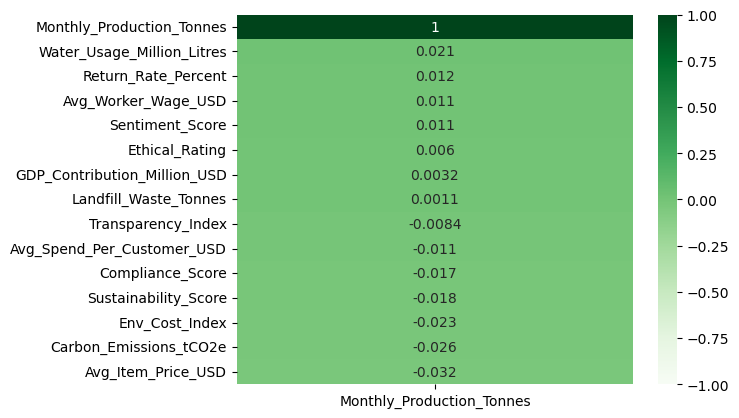

In [31]:
sns.heatmap(data_numerical.corr()[["Monthly_Production_Tonnes"]].sort_values(by = "Monthly_Production_Tonnes", ascending = False), 
    vmin = -1, 
    vmax = 1, 
    annot = True,
    cmap = "Greens"
)
plt.plot()

## Scatter Plots

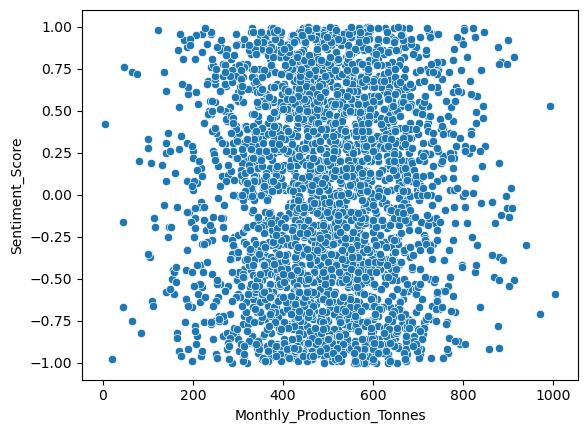

In [32]:
sns.scatterplot(
    data,
    x = "Monthly_Production_Tonnes",
    y = "Sentiment_Score",
)
plt.show()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2983 entries, 0 to 2995
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         2983 non-null   object 
 1   Country                       2983 non-null   object 
 2   Year                          2983 non-null   int64  
 3   Monthly_Production_Tonnes     2983 non-null   float64
 4   Avg_Item_Price_USD            2983 non-null   float64
 5   Release_Cycles_Per_Year       2983 non-null   int64  
 6   Carbon_Emissions_tCO2e        2983 non-null   float64
 7   Water_Usage_Million_Litres    2983 non-null   float64
 8   Landfill_Waste_Tonnes         2983 non-null   float64
 9   Avg_Worker_Wage_USD           2983 non-null   float64
 10  Working_Hours_Per_Week        2983 non-null   int64  
 11  Child_Labor_Incidents         2983 non-null   int64  
 12  Return_Rate_Percent           2983 non-null   float64
 13  Avg_Spen

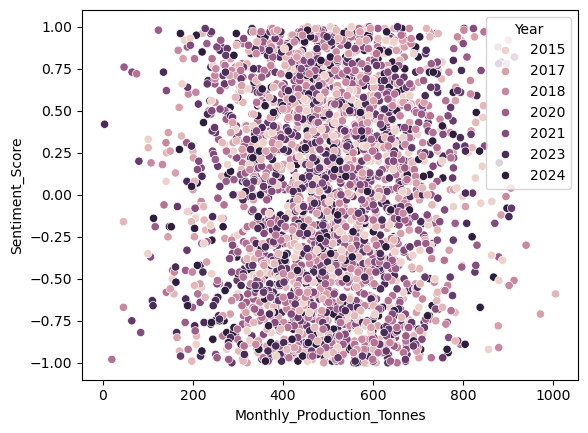

In [34]:
sns.scatterplot(
    data,
    x = "Monthly_Production_Tonnes",
    y = "Sentiment_Score",
    hue = "Year"
)
plt.show()

## Pair plot